## Package

Download `yfinance` package. Other packages are of course welcomed, but for this exercise I use this package.

In [1]:
pip install yfinance

## Get Data

I use `yf.download` function to download Berkshire Hathaway B stock data. The purpose is to use Warren Buffett's investment vehicle as reference.

In [2]:
import yfinance as yf

In [21]:
brkb = yf.download("BRK-B")

[*********************100%***********************]  1 of 1 completed


In [23]:
brkb.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
1996-05-09  22.200001  24.400000  22.200001  23.200001  23.200001  4290000
1996-05-10  24.000000  24.200001  23.600000  24.000000  24.000000  1060000
1996-05-13  24.000000  24.100000  23.299999  23.900000  23.900000   700000
1996-05-14  24.000000  24.100000  23.100000  23.600000  23.600000   310000
1996-05-15  23.600000  23.700001  23.000000  23.200001  23.200001   545000

In [24]:
brkb.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-11  341.230011  343.839996  340.929993  343.369995  343.369995   
2023-07-12  345.290009  346.440002  344.309998  345.350006  345.350006   
2023-07-13  345.600006  346.209991  343.450012  343.540009  343.540009   
2023-07-14  344.989990  345.000000  340.510010  341.089996  341.089996   
2023-07-17  341.089996  345.720001  341.089996  344.250000  344.250000   

             Volume  
Date                 
2023-07-11  2754900  
2023-07-12  2897100  
2023-07-13  2831800  
2023-07-14  2669300  
2023-07-17  2351551

## Plot

Let's plot the stock returns and it looks like normal distribution or some people may call this "white noise look alike".

<Axes: xlabel='Date'>

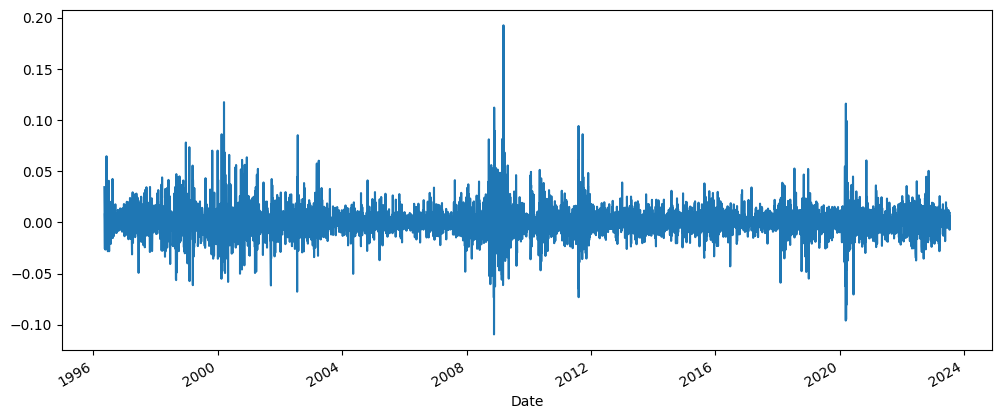

In [26]:
brkb.Close.pct_change().plot(figsize=(12,5))

## Sharpe Ratio

Formula and Calculation of the Sharpe Ratio:
$$
    \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$
whereas $R_p$ is the return of portfolio, $R_f$ is the risk-free rate, and $\sigma_p$ is the standard deviation of the portfolio's excess return.

For the sake of this exercise, I assume $R_f$ to be 0, even though we know interest rate is rising.

Source: [here](https://www.investopedia.com/terms/s/sharperatio.asp)

In [33]:
print(f"Daily average return is: {brkb.Close.pct_change().mean()}")
print(f"Daily volatility is: {brkb.Close.pct_change().std()}")
print(f"Sharpe ratio using daily data: {brkb.Close.pct_change().mean() / brkb.Close.pct_change().std()}")

Daily average return is: 0.0004960306785403613
Daily volatility is: 0.014310251717768957
Sharpe ratio using daily data: 0.03466261029667584


Let's a make a copy.

In [34]:
df = brkb
df.head()

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
1996-05-09  22.200001  24.400000  22.200001  23.200001  23.200001  4290000
1996-05-10  24.000000  24.200001  23.600000  24.000000  24.000000  1060000
1996-05-13  24.000000  24.100000  23.299999  23.900000  23.900000   700000
1996-05-14  24.000000  24.100000  23.100000  23.600000  23.600000   310000
1996-05-15  23.600000  23.700001  23.000000  23.200001  23.200001   545000

In [36]:
import pandas as pd

Let's make sure we can create a `date` variable so that we can convert our `Close` data to other time unit, e.g. monthly, and annually.

In [37]:
df['date'] = pd.to_datetime(df.index)

In [38]:
# Set the 'date' column as the DataFrame index
df.set_index('date', inplace=True)

The following code creates a data using `Close` column and resample using different time unit, e.g. monthly and annually, respectively.

In [40]:
# Resample the data to monthly frequency
monthly_data = df['Close'].resample('M').last()

# Resample the data to annual frequency
annual_data = df['Close'].resample('Y').last()

Compute Sharpe ratio using monthly data.

In [43]:
print(f"Monthly average return is: {monthly_data.pct_change().mean()}")
print(f"Monthly volatility is: {monthly_data.pct_change().std()}")
print(f"Sharpe ratio using monthly data: {monthly_data.pct_change().mean() / monthly_data.pct_change().std()}")

Monthly average return is: 0.01020963629296004
Monthly volatility is: 0.05532312895382812
Sharpe ratio using monthly data: 0.18454553251102


Comptue Sharpe ratio using annual data.

In [44]:
print(f"Annual average return is: {annual_data.pct_change().mean()}")
print(f"Annual volatility is: {annual_data.pct_change().std()}")
print(f"Sharpe ratio using yearly data: {annual_data.pct_change().mean() / annual_data.pct_change().std()}")

Annual average return is: 0.12295986776678944
Annual volatility is: 0.18779061502370614
Sharpe ratio using yearly data: 0.6547711010545832
